<a href="https://colab.research.google.com/github/teexone/object-segmentation-aml/blob/main/Object_Segmentation_%5BYOLOv8%2C_Faster_R_CNN%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# awkward code snippet to fix some issues with collab
# https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# Introduction

In this assignment, we will compare two instance segmentation models, Mask RCNN and YOLOv8, on their accuracy and efficiency. The evaluation was done on two objects, a toy venom model, and a coffee cup. The evaluation metrics used were Average Precision (AP), and inference time was measured. The training time of both models was also compared.

# YOLO v8

For the first instance segmentation model I implemented YOLO v8 as it accompanied with a standalone Python library and is intuitive and straightforward to us. 


Let us firstly install all the neccessary dependencies:

In [2]:
!wget "https://raw.githubusercontent.com/ultralytics/ultralytics/main/requirements.txt"
!pip install -r /content/requirements.txt

--2023-04-28 08:07:28--  https://raw.githubusercontent.com/ultralytics/ultralytics/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1107 (1.1K) [text/plain]
Saving to: ‘requirements.txt.1’

requirements.txt.1  100%[===================>]   1.08K  --.-KB/s    in 0s      

2023-04-28 08:07:28 (65.6 MB/s) - ‘requirements.txt.1’ saved [1107/1107]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 44.8 MB/s eta 0:00:00
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.1
    Uninstalling PyYAML-5.1:
      Successfully uninstalled PyYAML-5.1


In [3]:
!pip install roboflow ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The next step is to download our own dataset to be proceed by YOLO v8. I took 102 photos of my two favourite things: a tiny venom model and a termocup for coffee. Then, using Roboflow Annotate, I created a dataset with masks for each photo. 

Let us download this dataset:

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="nIU5i0GphiPWRZ3cOHGG")
project = rf.workspace("applied-machine-learning-assignment-i-innopolis-university").project("cup-and-venom-object-segmentation")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.89, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Cup-and-Venom-Object-Segmentation-1 in yolov8:: 100%|██████████| 216/216 [00:00<00:00, 612.98it/s]


Training of YOLOv8 is quite simple. Using pretrained model, let us feed annotated images to it and make predictions:

In [5]:
# ref: https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset

from ultralytics import YOLO
import torch
torch.use_deterministic_algorithms(False)

model = YOLO("yolov8s-seg.pt")
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=40,
    deterministic=False,
    exist_ok=True,
    batch=20,
    pretrained=True,
    imgsz=640
)

Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/Cup-and-Venom-Object-Segmentation-1/data.yaml, epochs=40, patience=50, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=True, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=False, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyna

Now, let us use trained model in infer the masks

---



In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import PIL

path_to_best = f"/content/runs/segment/train/weights/best.pt"

trained = YOLO(path_to_best)
results = trained.predict(source=f"{dataset.location}/test/images",
                conf=.25,
                save=True,
                show=True)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/10 /content/Cup-and-Venom-Object-Segmentation-1/test/images/IMG_3689_JPG.rf.9ee7e0173ed505249f54bfb63dc66ac0.jpg: 640x640 1 cup, 20.9ms
image 2/10 /content/Cup-and-Venom-Object-Segmentation-1/test/images/IMG_3691_JPG.rf.8764a14a4bfe32de29bb025b1d2fd5f2.jpg: 640x640 1 venom, 21.0ms
image 3/10 /content/Cup-and-Venom-Object-Segmentation-1/test/images/IMG_3703_JPG.rf.f7021b0bdb2385d04fa47df543f436a0.jpg: 640x640 2 cups, 20.9ms
image 4/10 /content/Cup-and-Venom-Object-Segmentation-1/test/images/IMG_3704_JPG.rf.2a3077c154844e1843680e63fe2a3728.jpg: 640x640 2 cups, 21.0ms
image 5/10 /content/Cup-and-Venom-Object-Segmentation-1/test/images/IMG_3711_JPG.rf.4a5a71e322ff3d9b36141fc83ab981dd.jpg: 640x640 (no detections), 21.1ms
image 6/10 /content/Cup-and-Venom-Object-Segmentation-1/test/images/IMG_3727_JPG.rf.2c39068d4f4d41279fcf651297d51be8.jpg: 640x640 2 cups, 21.0ms
image 7/10 /content/Cup-and-Venom-Object-Segme

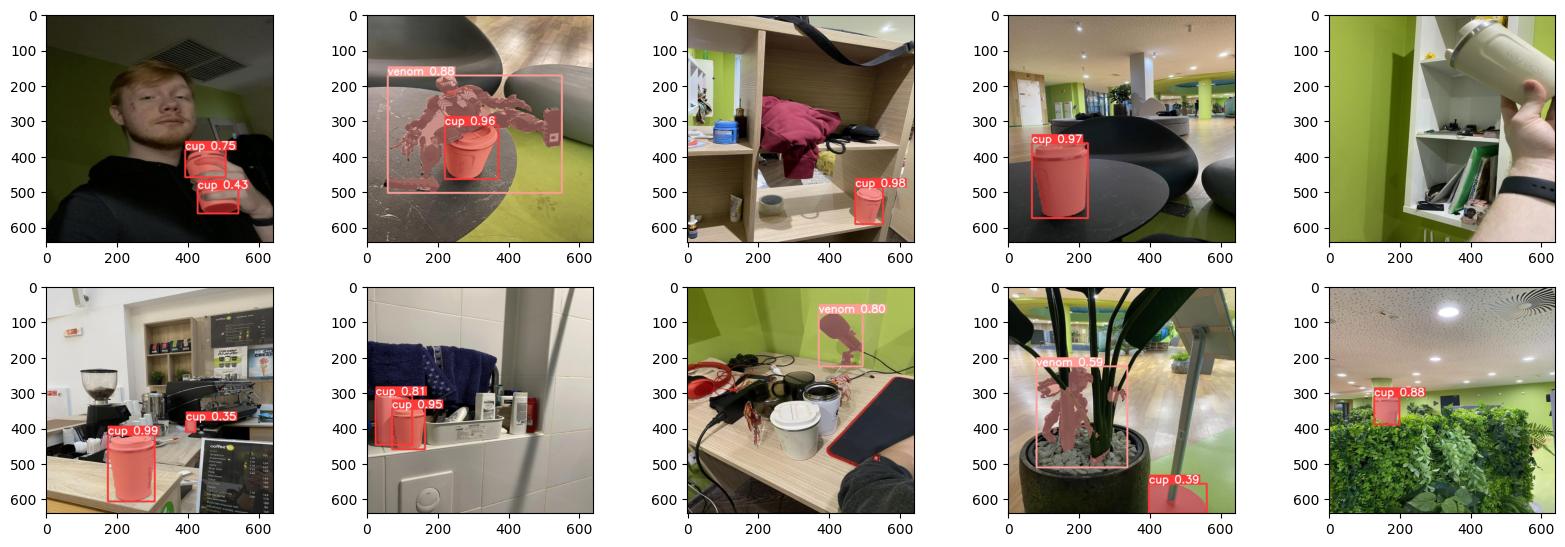

In [7]:
import os

images = []
for image_file in os.listdir("/content/runs/segment/predict"):
  img = PIL.Image.open(os.path.join("/content/runs/segment/predict", image_file))
  images.append(np.array(img))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    ax = plt.subplot(len(results) // columns + 1, columns, i + 1)
    ax.grid(False)
    plt.imshow(image)

# Mask RCNN

Mask R-CNN (Regional Convolutional Neural Network) is a deep learning model used for object detection and instance segmentation. It builds on the Faster R-CNN architecture, which uses a Region Proposal Network (RPN) to generate candidate object regions, and adds a mask prediction branch to output binary masks for each detected object instance.

The operates on an input image and generates a set of bounding boxes for the objects in the image, as well as a binary mask for each object. The model consists of two parts: a backbone network, which extracts features from the input image, and a detection network, which predicts the bounding boxes and masks for each object.

The backbone network is typically a pre-trained convolutional neural network, such as ResNet, that is used to extract features from the input image. The detection network consists of two branches: a box branch and a mask branch. The box branch uses the features extracted by the backbone network to predict the object bounding boxes, while the mask branch predicts the binary mask for each object.

Let us start with the installation of Mask RCNN using detectron2 framework

In [1]:
# ref: https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=FsePPpwZSmqt

!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'detectron2' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# ref: https://blog.roboflow.com/how-to-train-detectron2/

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

Then, we need to download the dataset in different format and prepare it to be fed into the model

In [3]:
!curl -L "https://app.roboflow.com/ds/f4Z8oRuSIs?key=lTwu9Hx1Bj" > roboflow.zip; unzip -o roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   892  100   892    0     0   1766      0 --:--:-- --:--:-- --:--:--  1762
100 5955k  100 5955k    0     0  2146k      0  0:00:02  0:00:02 --:--:-- 4612k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: test/IMG_3689_JPG.rf.9ee7e0173ed505249f54bfb63dc66ac0.jpg  
 extracting: test/IMG_3691_JPG.rf.8764a14a4bfe32de29bb025b1d2fd5f2.jpg  
 extracting: test/IMG_3703_JPG.rf.f7021b0bdb2385d04fa47df543f436a0.jpg  
 extracting: test/IMG_3704_JPG.rf.2a3077c154844e1843680e63fe2a3728.jpg  
 extracting: test/IMG_3711_JPG.rf.4a5a71e322ff3d9b36141fc83ab981dd.jpg  
 extracting: test/IMG_3727_JPG.rf.2c39068d4f4d41279fcf651297d51be8.jpg  
 extracting: test/IMG_3747_JPG.rf.c80ca0e13b295a7e64da7cadc4a71796.jpg  
 extracting: test/IMG_3756_JPG.rf.19ef73a4b960fae6e74406c259651e5f.jpg  
 

In [4]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")

When files are ready, the model is to be configured. I used the configuration provided in the [tutorial](https://blog.roboflow.com/how-to-train-detectron2/) to setup the model, changing only the maximum iteration number.

Actually, maximum iterations might be decreased more since number of photos and objects is quite small

In [5]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 200
cfg.SOLVER.MAX_ITER = 500 
cfg.SOLVER.GAMMA = 0.05

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

cfg.TEST.EVAL_PERIOD = 500

In [6]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [7]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[04/28 08:16:17 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[04/28 08:16:17 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[04/28 08:16:33 d2.utils.events]:  eta: 0:05:38  iter: 19  total_loss: 2.841  loss_cls: 1.477  loss_box_reg: 0.6971  loss_mask: 0.6811  loss_rpn_cls: 0.03896  loss_rpn_loc: 0.006379    time: 0.6937  last_time: 0.7895  data_time: 0.1005  last_data_time: 0.1530   lr: 9.5905e-05  max_mem: 3093M
[04/28 08:16:51 d2.utils.events]:  eta: 0:05:20  iter: 39  total_loss: 2.057  loss_cls: 0.7576  loss_box_reg: 0.6837  loss_mask: 0.5576  loss_rpn_cls: 0.03158  loss_rpn_loc: 0.004909    time: 0.7109  last_time: 0.6166  data_time: 0.0943  last_data_time: 0.0778   lr: 0.0001958  max_mem: 3093M
[04/28 08:17:05 d2.utils.events]:  eta: 0:05:07  iter: 59  total_loss: 1.724  loss_cls: 0.5251  loss_box_reg: 0.6769  loss_mask: 0.4314  loss_rpn_cls: 0.03092  loss_rpn_loc: 0.005315    time: 0.7043  last_time: 0.6542  data_time: 0.0954  last_data_time: 0.0779   lr: 0.00029571  max_mem: 3093M
[04/28 08:17:19 d2.utils.events]:  eta: 0:04:50  iter: 79  total_loss: 1.358  loss_cls: 0.3227  loss_box_reg: 0.6759  lo

The model is trained. Now it is time to infer

In [8]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

[04/28 08:35:34 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
[04/28 08:35:35 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [04/28 08:35:35 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [04/28 08:35:35 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/28 08:35:35 d2.data.datasets.coco]: Loaded 10 images in COCO format from /content/test/_annotations.coco.json
[04/28 08:35:35 d2.data.build]: Distribution of instances among all 3 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
| cup-and-venom | 0            |    cup     | 10           |   venom    | 6           

OrderedDict([('bbox',
              {'AP': 54.86602231651738,
               'AP50': 74.55209806694954,
               'AP75': 53.92503536067892,
               'APs': 49.99999999999999,
               'APm': 54.58981612446959,
               'APl': 74.12953795379538,
               'AP-cup-and-venom': nan,
               'AP-cup': 63.98121955052647,
               'AP-venom': 45.75082508250826}),
             ('segm',
              {'AP': 55.21766462360522,
               'AP50': 74.55209806694954,
               'AP75': 53.3003300330033,
               'APs': 89.99999999999999,
               'APm': 50.82095709570956,
               'APl': 62.11014851485148,
               'AP-cup-and-venom': nan,
               'AP-cup': 63.22410812509822,
               'AP-venom': 47.211221122112214})])

[04/28 08:35:43 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


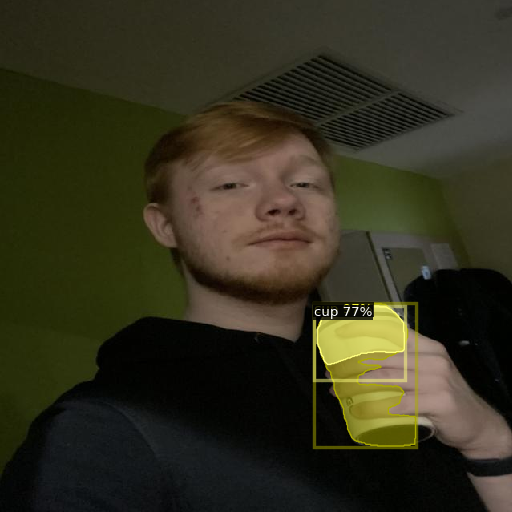

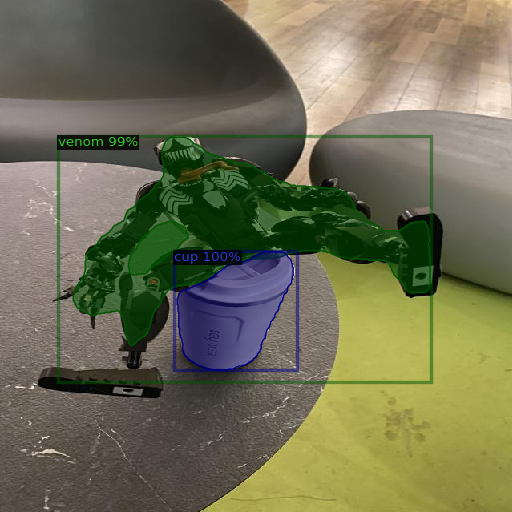

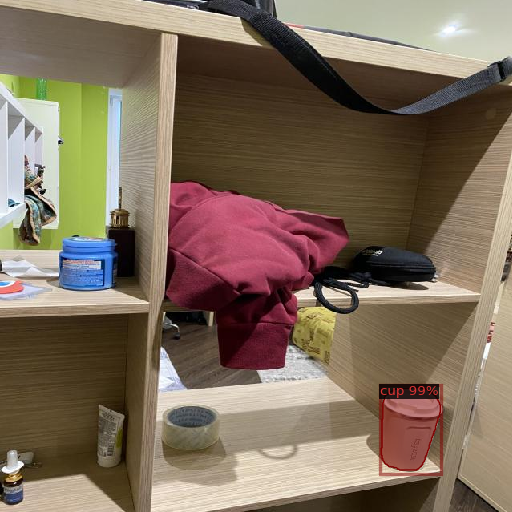

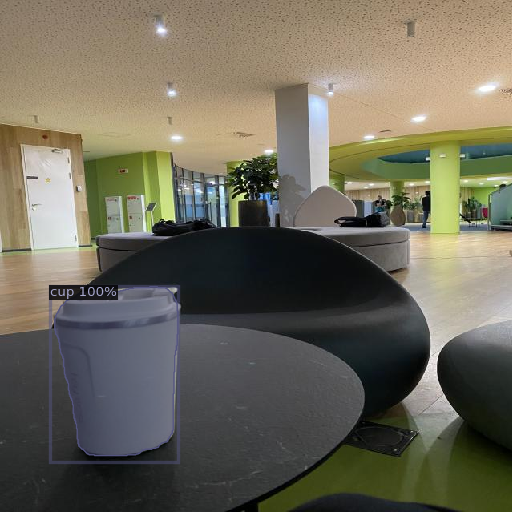

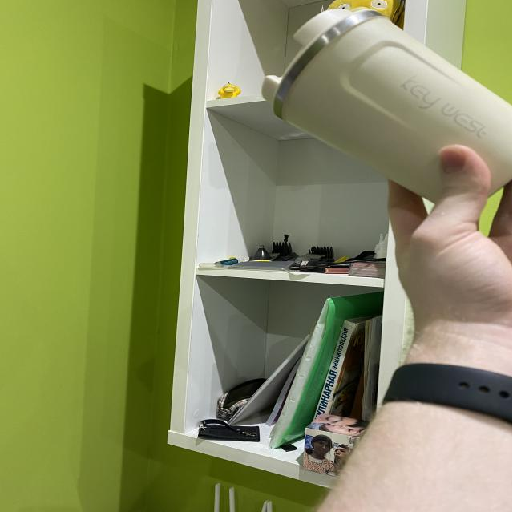

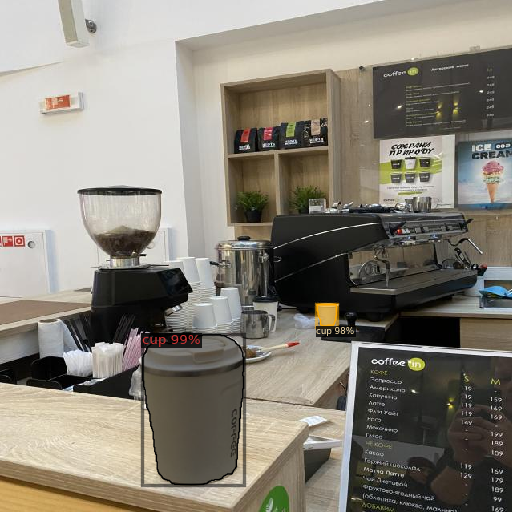

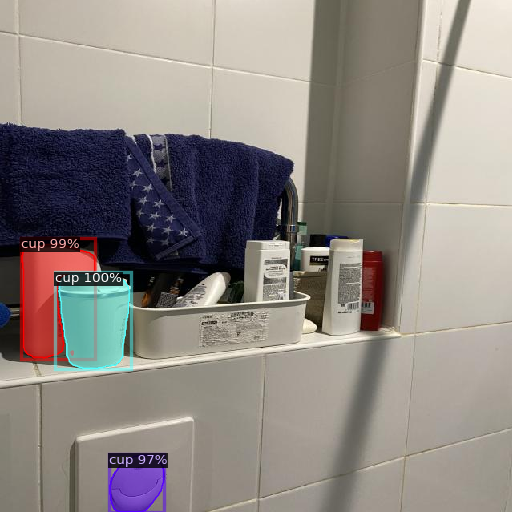

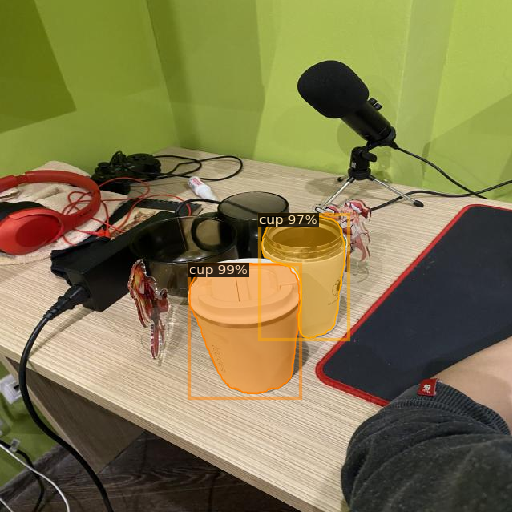

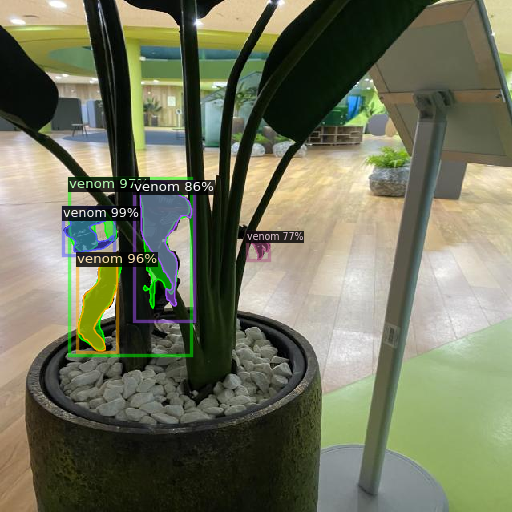

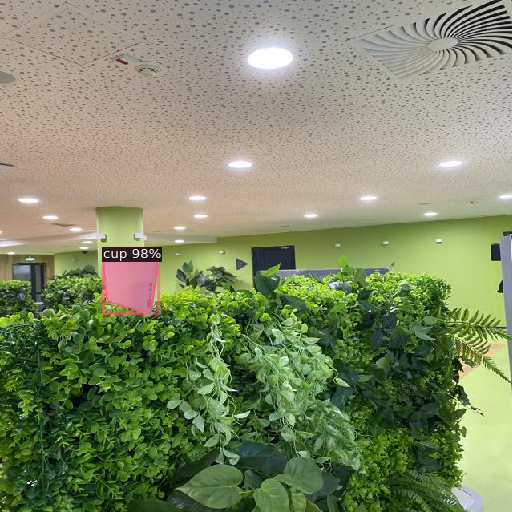

In [9]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

# Conclusion 

Based on the results, we can conclude that YOLOv8 is a more accurate instance segmentation model than Mask RCNN, with an AP of 0.796 compared to 0.549 of Mask RCNN for all classes and sizes. YOLOv8 is also better at segmenting small objects located in the background, while Mask RCNN is more confident in detecting objects, giving approximately 100% probability for each object's mask.

In terms of inference time, YOLOv8 appeared to be faster in case of segmnetation with inference time of 5.5ms. In comparison, Mask RCNN took 0,01s to complete the inference. 

It is worth noting that the training time for YOLOv8 is significantly less than for Mask RCNN. This could be an essential factor for applications where quick model training is required.
